In [1]:
from imports import *
from transformers import ResNetForImageClassification, ResNetConfig

In [8]:
resnet = ResNetForImageClassification.from_pretrained('resnet_pvr_model', num_labels=10)
config = resnet.config
resnet

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

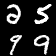

In [10]:
image = Image.open('pvr_mnist_dataset/images/combined_image_2.png').convert('RGB')
transforms.ToPILImage()(np.array(image))

In [11]:
import pyvene as pv

config = resnet.config

pv_resnet = pv.IntervenableModel({
    "component": "resnet.embedder.pooler.output", 
    "source_representation": torch.zeros(config.pooler_shape, dtype = torch.float32)}, model=resnet)


intervened_outputs = pv_resnet(
    base = torch.tensor(np.array(image), dtype = torch.float32).reshape(1,-1,56,56), 
    unit_locations={"sources->base": [0,5]}
    # unit_locations={"base": [0,1,2,3]}, 
    # subspaces=[0,1,2,3]
    )[0][-1][0]

'''
The unit locations has been defined in such a way that it corresponds to the 
language models having the dimension in the order (batch_size, sequence_length, hidden_size).
Meanwhile, the images have the dimension in the order 
(batch_size, channels, height, width), hence creating an issue.
'''

# I think intervened output gives both the output of the model, i.e. the prediction of counterfactual and also of factual model.

# print("Now finally, the model has ran and this is the intervened output" +str( intervened_outputs))

print(intervened_outputs)
predicted_indices = torch.argmax(intervened_outputs)
class_names = [str(i) for i in range(10)]  # Class names from 0 to 9
# predicted_classes = [class_names[idx] for idx in predicted_indices.cpu().numpy()]
class_names[int(predicted_indices)]

# The "top right" digit has been predicted. 

tensor([-2.9909, -2.2488, -0.2795, -0.0157, -2.4382, 15.0471, -1.1581, -1.0064,
        -0.6698,  3.0025])


'5'